# Single Systems
From __[IBM:basics-of-quantum-information/single-systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems)__

Intro to qiskit and I guess some numpy arrays:

In [1]:
from qiskit import __version__
print(__version__)

1.4.0


In [2]:
# Vectors and Matrices in python
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0/2 + ket1/2)

[[0.5]
 [0.5]]


In [3]:
M1 = np.array([[1,1],[0,0]])
M2 = np.array([[1,0],[0,1]])
M = M1/2 + M2/2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [4]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [5]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M,  M )))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Statevectors

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))  # this is dope

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [7]:
display(u.is_valid()) # true because |1/sqrt(2)|^2 + |1/sqrt(2)|^2 = 1
display(w.is_valid())  # false because |1/3|^2 + |2/3|^2 = 5/9 is not 1

True

False

#### Simulating Measurements

using the measure method from the statevector class

In [8]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [9]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

Note that measurements can be different when run different times because of the different probabilities shown in [13]

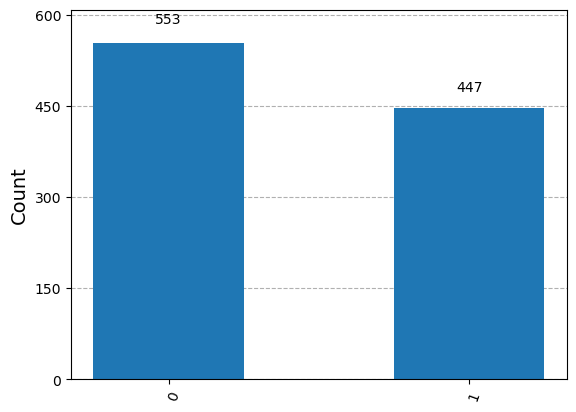

In [10]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

### Performing operations with Operator and Statevector


In [11]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [12]:
# Apply operation using evolve
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits
Even if we haven't explored quantum circuits we can mess around with the operators we learned about. A quantum circuit is a sequence of unitary operations performed on a single qubit

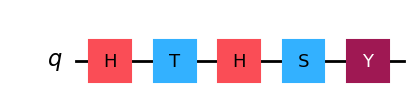

<IPython.core.display.Latex object>

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

In [15]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

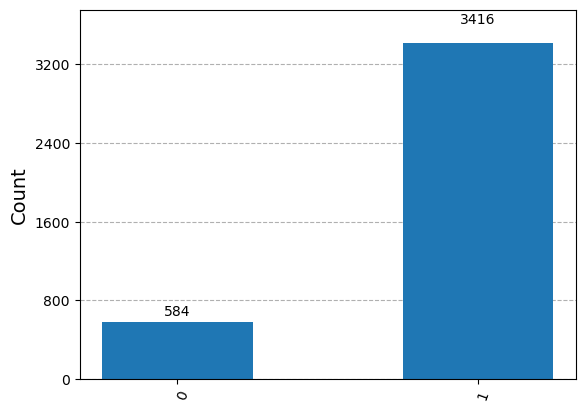

In [22]:
#simulates an experiment where the state obtained from the circuit above is 
# measured with a standard basis measurement 4,000 times
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))